# WORLD HAPPINESS ANALSYIS

### SOURCE: https://worldhappiness.report/ed/2019/

### James Dietz, Chris Howard, Rafael Santos

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [81]:
happiness = pd.read_csv("happiness2018.csv")
happiness.head()

,Country,Year,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,Democratic_Quality,Delivery_Quality,Std_dev_ladder,Std_dev/mean,GINI_avg_2000-2016
0,Afghanistan,2018,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,0.364666,NaN,NaN,1.408344,0.522712,NaN
1,Albania,2018,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,NaN,NaN,2.640531,0.527642,0.303250
2,Algeria,2018,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,NaN,NaN,NaN,1.973943,0.391416,0.276000
3,Angola,2014,3.794838,8.741481,0.754615,54.599998,0.374542,-0.157062,0.834076,0.578517,0.367864,0.572346,-0.739363,-1.168539,2.196711,0.578868,0.473500
4,Argentina,2018,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,NaN,NaN,2.472559,0.426833,0.460938


In [82]:
happiness.drop(['Year', 'Std_dev_ladder', 'Std_dev/mean', 'Democratic_Quality', 'Delivery_Quality'], axis=1, inplace=True)

In [83]:
happiness.tail()

,Country,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,GINI_avg_2000-2016
161,Venezuela,5.005663,9.270281,0.886882,66.500000,0.610855,-0.176156,0.827560,0.759221,0.373658,0.260700,0.497167
162,Vietnam,5.295547,8.783416,0.831945,67.900002,0.909260,-0.039124,0.808423,0.692222,0.191061,NaN,0.362750
163,Yemen,3.057514,NaN,0.789422,56.700001,0.552726,NaN,0.792587,0.461114,0.314870,0.308151,0.357000
164,Zambia,4.041488,8.223958,0.717720,55.299999,0.790626,0.036644,0.810731,0.702698,0.350963,0.606715,0.527400
165,Zimbabwe,3.616480,7.553395,0.775388,55.599998,0.762675,-0.038384,0.844209,0.710119,0.211726,0.550508,0.432000


In [84]:
happysort = happiness.sort_values(by='Life_Ladder', ascending=False)
happysort

,Country,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,GINI_avg_2000-2016
48,Finland,7.858107,10.636060,0.962155,71.900002,0.937807,-0.131735,0.198605,0.781546,0.181781,0.555102,0.275615
40,Denmark,7.648786,10.755594,0.958219,72.400002,0.935438,0.015593,0.150607,0.821423,0.206053,0.632478,0.267000
143,Switzerland,7.508587,10.975945,0.930291,74.099998,0.926415,0.096369,0.301260,0.792226,0.191520,0.849979,0.328100
63,Iceland,7.476214,10.746841,0.966753,73.000000,0.938783,0.243324,0.726845,0.895255,0.148160,0.365042,0.280833
105,Netherlands,7.463097,10.809204,0.939443,72.300003,0.919985,0.155536,0.370558,0.861977,0.204794,0.656541,0.286333
111,Norway,7.444262,11.085626,0.965962,73.199997,0.960429,0.075728,0.268201,0.827414,0.211862,0.679503,0.272231
7,Austria,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,0.226059,0.488679,0.302692
142,Sweden,7.374792,10.766932,0.930680,72.599998,0.941725,0.069573,0.262797,0.822676,0.160755,0.494396,0.274154
106,New Zealand,7.370286,10.501477,0.953863,73.199997,0.949300,0.116750,0.206580,0.845363,0.167951,0.642461,NaN
87,Luxembourg,7.242631,11.453928,0.902192,72.599998,0.883930,-0.025496,0.385146,0.750309,0.201894,0.755201,0.316077


## SORTING INTO CLUSTERS

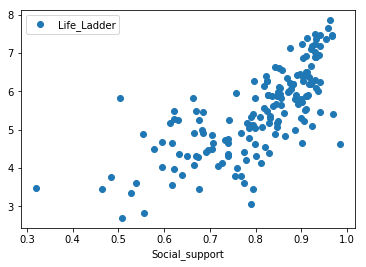

In [85]:
# Plot the data
happiness.plot(x='Social_support', y='Life_Ladder', style='o')


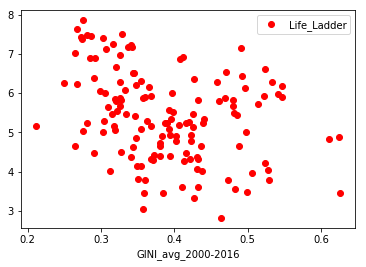

In [86]:
happiness.plot(x='GINI_avg_2000-2016', y='Life_Ladder', c='red', style='o')

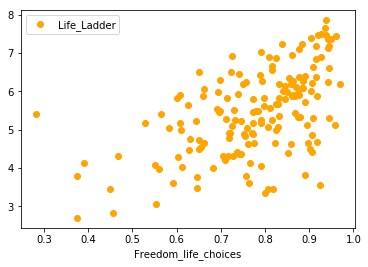

In [87]:
happiness.plot(x='Freedom_life_choices', y='Life_Ladder', c='orange', style='o')

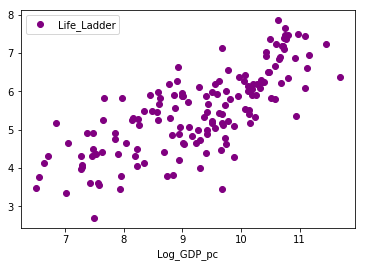

In [88]:
happiness.plot(x='Log_GDP_pc', y='Life_Ladder', c='purple', style='o')

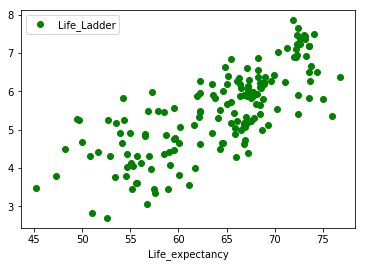

In [89]:
happiness.plot(x='Life_expectancy', y='Life_Ladder', c='green', style='o')

In [90]:
socialsupport = happiness[['Life_Ladder', 'Social_support']].copy()
socialsupport.head()

,Life_Ladder,Social_support
0,2.694303,0.507516
1,5.004403,0.683592
2,5.043086,0.798651
3,3.794838,0.754615
4,5.792797,0.899912


In [91]:
GINI = happiness[['Life_Ladder', 'GINI_avg_2000-2016']].copy()
GINI.head()

,Life_Ladder,GINI_avg_2000-2016
0,2.694303,NaN
1,5.004403,0.303250
2,5.043086,0.276000
3,3.794838,0.473500
4,5.792797,0.460938


In [92]:
lifeexpectancy = happiness[['Life_Ladder', 'Life_expectancy']].copy()
lifeexpectancy.head()

,Life_Ladder,Life_expectancy
0,2.694303,52.599998
1,5.004403,68.699997
2,5.043086,65.900002
3,3.794838,54.599998
4,5.792797,68.800003


In [93]:
socialsupport.dropna(inplace=True)

In [94]:
GINI.dropna(inplace=True)

In [95]:
lifeexpectancy.dropna(inplace=True)

In [96]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [97]:
kmeans.fit(socialsupport)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [98]:
# Predict the clusters
predicted_clusters = kmeans.predict(socialsupport)
predicted_clusters

array([2, 1, 1, 2, 3, 1, 0, 0, 1, 3, 2, 1, 0, 3, 3, 1, 1, 3, 3, 2, 3, 1,
       1, 2, 1, 1, 0, 2, 2, 3, 1, 3, 2, 1, 2, 0, 1, 1, 3, 0, 0, 2, 1, 3,
       2, 3, 3, 2, 0, 0, 1, 1, 1, 0, 1, 1, 3, 1, 3, 2, 3, 1, 3, 0, 2, 1,
       2, 2, 0, 0, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 2, 2, 1, 3, 0,
       1, 2, 2, 1, 2, 0, 2, 3, 3, 3, 1, 3, 1, 1, 2, 1, 1, 0, 0, 3, 1, 1,
       3, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 1, 3, 2, 3, 3, 3, 1, 1,
       1, 3, 2, 3, 2, 2, 3, 2, 0, 0, 2, 3, 3, 2, 3, 2, 3, 1, 1, 1, 2, 1,
       3, 0, 0, 3, 3, 1, 1, 2, 2, 2], dtype=int32)

In [99]:
socialsupport['predicted_cluster'] = predicted_clusters

In [100]:
socialsupport.head()

,Life_Ladder,Social_support,predicted_cluster
0,2.694303,0.507516,2
1,5.004403,0.683592,1
2,5.043086,0.798651,1
3,3.794838,0.754615,2
4,5.792797,0.899912,3


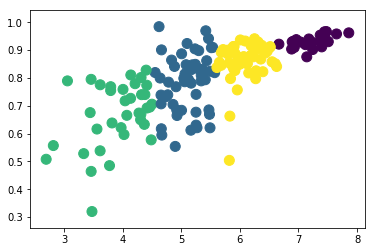

In [101]:
plt.scatter(socialsupport.Life_Ladder, socialsupport.Social_support, s=100, c=socialsupport.predicted_cluster)

In [102]:
kmeans.fit(GINI)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [103]:
# Predict the clusters
predicted_clusters_GINI = kmeans.predict(GINI)
predicted_clusters_GINI

array([2, 2, 0, 1, 2, 3, 3, 2, 0, 2, 3, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 2,
       3, 0, 0, 1, 2, 1, 0, 2, 0, 3, 2, 1, 3, 3, 0, 2, 1, 0, 1, 1, 0, 3,
       3, 2, 2, 2, 3, 2, 2, 1, 2, 0, 1, 1, 3, 0, 2, 0, 0, 3, 3, 1, 2, 1,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 0, 1, 3, 2, 0, 0, 2, 0, 3, 0, 1, 1,
       1, 2, 1, 2, 2, 0, 2, 2, 3, 1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 2, 0, 2,
       0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 3, 3, 0, 1, 0, 1, 0, 2, 2, 0, 2, 3,
       3, 1, 1, 2, 2, 0, 0, 0], dtype=int32)

In [104]:
GINI['predicted_cluster'] = predicted_clusters_GINI

In [105]:
GINI.head()

,Life_Ladder,GINI_avg_2000-2016,predicted_cluster
1,5.004403,0.303250,2
2,5.043086,0.276000,2
3,3.794838,0.473500,0
4,5.792797,0.460938,1
5,5.062449,0.319250,2


In [106]:
GINI = GINI.rename(columns={"GINI_avg_2000-2016": "GINI_avg"})

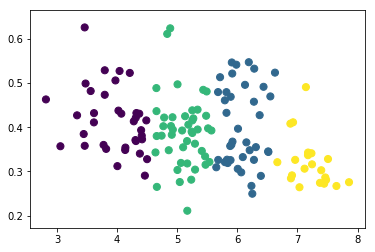

In [107]:
plt.scatter(GINI.Life_Ladder, GINI.GINI_avg, s=50, c=GINI.predicted_cluster)

In [108]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [109]:
kmeans.fit(lifeexpectancy)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [110]:
# Predict the clusters
predicted_clusters_LE = kmeans.predict(lifeexpectancy)
predicted_clusters_LE

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2, 0, 2, 0, 1, 2,
       2, 1, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0,
       2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 1, 1,
       0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1,
       0, 1, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 1, 1, 1], dtype=int32)

In [111]:
lifeexpectancy['predicted_cluster'] = predicted_clusters_LE
lifeexpectancy.head()

,Life_Ladder,Life_expectancy,predicted_cluster
0,2.694303,52.599998,1
1,5.004403,68.699997,2
2,5.043086,65.900002,2
3,3.794838,54.599998,1
4,5.792797,68.800003,2


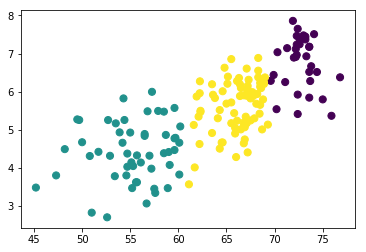

In [112]:
plt.scatter(lifeexpectancy.Life_expectancy, lifeexpectancy.Life_Ladder, s=50, c=lifeexpectancy.predicted_cluster)

In [113]:
happiness.dropna(inplace=True)
happiness.tail()

,Country,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,GINI_avg_2000-2016
159,Uruguay,6.371715,9.959661,0.917316,69.000000,0.876211,-0.108451,0.682916,0.876920,0.274946,0.361706,0.427364
160,Uzbekistan,6.205460,8.773365,0.920821,65.099998,0.969898,0.311695,0.520360,0.825422,0.208660,0.969356,0.348000
161,Venezuela,5.005663,9.270281,0.886882,66.500000,0.610855,-0.176156,0.827560,0.759221,0.373658,0.260700,0.497167
164,Zambia,4.041488,8.223958,0.717720,55.299999,0.790626,0.036644,0.810731,0.702698,0.350963,0.606715,0.527400
165,Zimbabwe,3.616480,7.553395,0.775388,55.599998,0.762675,-0.038384,0.844209,0.710119,0.211726,0.550508,0.432000


In [114]:
happiness = happiness.rename(columns={"GINI_avg_2000-2016": "GINI_avg"})
happiness

,Country,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,GINI_avg
1,Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,0.303250
3,Angola,3.794838,8.741481,0.754615,54.599998,0.374542,-0.157062,0.834076,0.578517,0.367864,0.572346,0.473500
4,Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,0.460938
5,Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,0.319250
6,Australia,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837,0.342750
7,Austria,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,0.226059,0.488679,0.302692
8,Azerbaijan,5.167995,9.678014,0.781230,65.500000,0.772449,-0.251795,0.561206,0.592575,0.191392,0.834372,0.211000
10,Bangladesh,4.499217,8.220746,0.705556,64.300003,0.901471,-0.038008,0.701421,0.541345,0.361238,0.831693,0.327750
11,Belarus,5.233770,9.778739,0.904569,66.099998,0.643602,-0.181865,0.718455,0.450333,0.235729,0.421279,0.281294
12,Belgium,6.892172,10.672445,0.929816,72.000000,0.808387,-0.127278,0.630412,0.749563,0.250297,0.441945,0.284308


# CLASSIFICATION

## CLUSTERING USING KMEANS

In [115]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [116]:
# Cluster using GINI Coefficient and Life_Ladder
kmeans = kmeans.fit(happiness[['Life_Ladder','GINI_avg']])
# Save the labels
happiness.loc[:,'label'] = kmeans.labels_
happiness.head()

,Country,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,GINI_avg,label
1,Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,0.303250,1
3,Angola,3.794838,8.741481,0.754615,54.599998,0.374542,-0.157062,0.834076,0.578517,0.367864,0.572346,0.473500,1
4,Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,0.460938,0
5,Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,0.319250,1
6,Australia,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837,0.342750,0


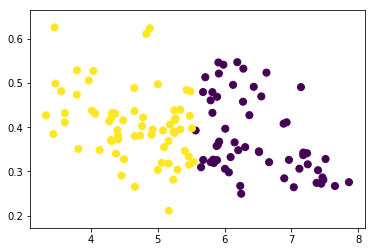

In [117]:
plt.scatter(happiness.Life_Ladder, happiness.GINI_avg, s=50, c=happiness.label)

In [118]:
happinessgroups = happiness.groupby(['label', 'Country']).sum()
happinessgroups

Life_Ladder  Log_GDP_pc  Social_support  \
label Country                                                           
0     Argentina                  5.792797    9.809972        0.899912   
      Australia                  7.176993   10.721021        0.940137   
      Austria                    7.396002   10.741893        0.911668   
      Belgium                    6.892172   10.672445        0.929816   
      Benin                      5.819827    7.663907        0.503544   
      Bhutan                     5.569092    8.863728        0.818949   
      Bolivia                    5.915734    8.860531        0.827159   
      Bosnia and Herzegovina     5.887401    9.402726        0.835890   
      Brazil                     6.190922    9.557933        0.881505   
      Canada                     7.175497   10.701248        0.922719   
      Chile                      6.436221   10.065920        0.890085   
      Colombia                   5.983512    9.511734        0.870970   
      Costa Rica                 7.141075    9.669426        0.875872   
      Czech Republic             7.034165   10.419474        0.929164   
      Denmark                    7.648786   10.755594        0.958219   
      Ecuador                    6.128010    9.274455        0.851345   
      El Salvador                6.276246    8.911959        0.823999   
      Estonia                    6.091302   10.324107        0.932694   
      Finland                    7.858107   10.636060        0.962155   
      France                     6.665904   10.573352        0.921463   
      Germany                    7.118364   10.730945        0.919763   
      Guatemala                  6.626592    8.923429        0.841107   
      Honduras                   5.908424    8.439203        0.827067   
      Hungary                    6.065039   10.195319        0.876748   
      Iceland                    7.476214   10.746841        0.966753   
      Ireland                    6.962336   11.163328        0.937862   
      Israel                     6.927179   10.424574        0.909595   
      Italy                      6.516527   10.480516        0.912656   
      Jamaica                    5.889759    9.011105        0.913030   
      Japan                      5.793575   10.581618        0.886432   
...                                   ...         ...             ...   
1     Liberia                    4.134853    6.630170        0.726750   
      Macedonia                  5.239835    9.503044        0.848915   
      Madagascar                 4.070587    7.279895        0.665513   
      Malawi                     3.334634    7.005932        0.527843   
      Malaysia                   5.338818   10.235504        0.789409   
      Mali                       4.415730    7.627428        0.691859   
      Mauritania                 4.313615    8.196549        0.801596   
      Mongolia                   5.464623    9.415703        0.941514   
      Mozambique                 4.653714    7.039378        0.738480   
      Myanmar                    4.410633    8.685232        0.773826   
      Namibia                    4.834088    9.156214        0.864215   
      Nepal                      4.910087    7.851007        0.768336   
      Niger                      5.164007    6.844518        0.612026   
      Nigeria                    5.252288    8.577633        0.740854   
      Pakistan                   5.471554    8.561664        0.685059   
      Russia                     5.513500   10.132390        0.908726   
      Rwanda                     3.561047    7.567531        0.616173   
      Senegal                    4.769377    7.850694        0.739355   
      Sierra Leone               4.305683    7.266166        0.649638   
      South Africa               4.883922    9.411724        0.841344   
      Sri Lanka                  4.400223    9.400388        0.828065   
      Tanzania                   3.445023    7.928911        0.675330   
      Togo     

## NEURAL NETWORK

In [139]:
happiness2 = happiness.copy()
happiness2

,Country,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,GINI_avg,label
1,Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,0.303250,1
3,Angola,3.794838,8.741481,0.754615,54.599998,0.374542,-0.157062,0.834076,0.578517,0.367864,0.572346,0.473500,1
4,Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,0.460938,0
5,Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,0.319250,1
6,Australia,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837,0.342750,0
7,Austria,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,0.226059,0.488679,0.302692,0
8,Azerbaijan,5.167995,9.678014,0.781230,65.500000,0.772449,-0.251795,0.561206,0.592575,0.191392,0.834372,0.211000,1
10,Bangladesh,4.499217,8.220746,0.705556,64.300003,0.901471,-0.038008,0.701421,0.541345,0.361238,0.831693,0.327750,1
11,Belarus,5.233770,9.778739,0.904569,66.099998,0.643602,-0.181865,0.718455,0.450333,0.235729,0.421279,0.281294,1
12,Belgium,6.892172,10.672445,0.929816,72.000000,0.808387,-0.127278,0.630412,0.749563,0.250297,0.441945,0.284308,0


In [144]:
happiness2.drop(['Life_Ladder', 'GINI_avg', 'Country'], axis=1, inplace=True)
happiness2.head()

,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,label
1,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,1
3,8.741481,0.754615,54.599998,0.374542,-0.157062,0.834076,0.578517,0.367864,0.572346,1
4,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,0
5,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,1
6,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837,0


In [145]:
# Assign X (data) and y (target)
X = happiness2.drop("label", axis=1)
y = happiness2["label"]
print(X.shape, y.shape) 

(123, 9) (123,)


In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [147]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [148]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow
tensorflow.keras.__version__

'2.1.2-tf'

In [149]:
from sklearn.preprocessing import LabelEncoder
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [150]:
from keras.utils import to_categorical

In [151]:
# Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)


In [152]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=9))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [153]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [154]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 11,302
Trainable params: 11,302
Non-trainable params: 0
_________________________________________________________________


In [155]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
 - 0s - loss: 0.6818 - acc: 0.4674
Epoch 2/60
 - 0s - loss: 0.6418 - acc: 0.7065
Epoch 3/60
 - 0s - loss: 0.6068 - acc: 0.8261
Epoch 4/60
 - 0s - loss: 0.5788 - acc: 0.8261
Epoch 5/60
 - 0s - loss: 0.5503 - acc: 0.8478
Epoch 6/60
 - 0s - loss: 0.5209 - acc: 0.8587
Epoch 7/60
 - 0s - loss: 0.4970 - acc: 0.8587
Epoch 8/60
 - 0s - loss: 0.4720 - acc: 0.8696
Epoch 9/60
 - 0s - loss: 0.4477 - acc: 0.8587
Epoch 10/60
 - 0s - loss: 0.4242 - acc: 0.8587
Epoch 11/60
 - 0s - loss: 0.4026 - acc: 0.8587
Epoch 12/60
 - 0s - loss: 0.3848 - acc: 0.8587
Epoch 13/60
 - 0s - loss: 0.3689 - acc: 0.8587
Epoch 14/60
 - 0s - loss: 0.3535 - acc: 0.8696
Epoch 15/60
 - 0s - loss: 0.3434 - acc: 0.8804
Epoch 16/60
 - 0s - loss: 0.3308 - acc: 0.8804
Epoch 17/60
 - 0s - loss: 0.3233 - acc: 0.8696
Epoch 18/60
 - 0s - loss: 0.3137 - acc: 0.8696
Epoch 19/60
 - 0s - loss: 0.3147 - acc: 0.8696
Epoch 20/60
 - 0s - loss: 0.3033 - acc: 0.8913
Epoch 21/60
 - 0s - loss: 0.2957 - acc: 0.8804
Epoch 22/60
 - 0s - lo

In [156]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.5300875902175903, Accuracy: 0.7419354915618896


In [157]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [158]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: [1 1 1 1 0]
Actual Labels: [1, 1, 0, 0, 0]


## LOGISTIC REGRESSION

In [159]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [160]:
classifier.fit(X_train_scaled, y_train)

/Users/jamesdietz/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [161]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9130434782608695
Testing Data Score: 0.7096774193548387


## LINEAR REGRESSION

In [162]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [174]:
happiness

,Country,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,GINI_avg,label
1,Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,0.303250,1
3,Angola,3.794838,8.741481,0.754615,54.599998,0.374542,-0.157062,0.834076,0.578517,0.367864,0.572346,0.473500,1
4,Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,0.460938,0
5,Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,0.319250,1
6,Australia,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837,0.342750,0
7,Austria,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,0.226059,0.488679,0.302692,0
8,Azerbaijan,5.167995,9.678014,0.781230,65.500000,0.772449,-0.251795,0.561206,0.592575,0.191392,0.834372,0.211000,1
10,Bangladesh,4.499217,8.220746,0.705556,64.300003,0.901471,-0.038008,0.701421,0.541345,0.361238,0.831693,0.327750,1
11,Belarus,5.233770,9.778739,0.904569,66.099998,0.643602,-0.181865,0.718455,0.450333,0.235729,0.421279,0.281294,1
12,Belgium,6.892172,10.672445,0.929816,72.000000,0.808387,-0.127278,0.630412,0.749563,0.250297,0.441945,0.284308,0


In [175]:
regress = happiness.copy()

In [176]:
regress.drop(['label', 'Country', 'Positive_affect'], axis=1, inplace=True)
regress

,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Negative_affect,Confidence_government,GINI_avg
1,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.318997,0.435338,0.303250
3,3.794838,8.741481,0.754615,54.599998,0.374542,-0.157062,0.834076,0.367864,0.572346,0.473500
4,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.320502,0.261352,0.460938
5,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.454840,0.670828,0.319250
6,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.187456,0.468837,0.342750
7,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.226059,0.488679,0.302692
8,5.167995,9.678014,0.781230,65.500000,0.772449,-0.251795,0.561206,0.191392,0.834372,0.211000
10,4.499217,8.220746,0.705556,64.300003,0.901471,-0.038008,0.701421,0.361238,0.831693,0.327750
11,5.233770,9.778739,0.904569,66.099998,0.643602,-0.181865,0.718455,0.235729,0.421279,0.281294
12,6.892172,10.672445,0.929816,72.000000,0.808387,-0.127278,0.630412,0.250297,0.441945,0.284308


In [177]:
# Assign X (data) and y (target)
X = regress.drop("Life_Ladder", axis=1)
y = regress["Life_Ladder"]
print(X.shape, y.shape) 

(123, 9) (123,)


In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
X_scaler = StandardScaler().fit(X)

X_scaled = X_scaler.transform(X)

In [180]:
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_scaled, y)

score = model.score(X_scaled, y)
print(f"R2 Score: {score}") 

R2 Score: 0.7440416361023529


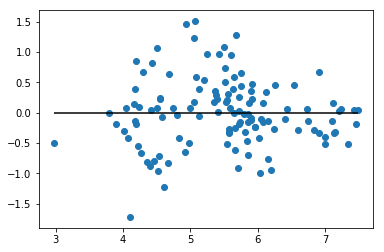

In [181]:
predictions = model.predict(X_scaled)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

## OLS MODEL (this is not machine learning OLS)

In [182]:
X_constant = sm.add_constant(X)

In [183]:
model = sm.OLS(y, X_constant)
lin_reg = model.fit()

In [184]:
lin_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life_Ladder   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     36.50
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           1.77e-29
Time:                        13:34:58   Log-Likelihood:                -101.74
No. Observations:                 123   AIC:                             223.5
Df Residuals:                     113   BIC:                             251.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.3692      1.147     -0.322      0.748      -2.642       1.903
Log_GDP_pc                 0.3135      0.098      3.211      0.002       0.120       0.507
Social_support             1.9910      0.862      2.309      0.023       0.283       3.699
Life_expectancy            0.0149      0.016      0.905      0.367      -0.018       0.048
Freedom_life_choices       2.6025      0.620      4.199      0.000       1.374       3.831
Generosity                 0.5819      0.396      1.469      0.145      -0.203       1.367
Perceptions_corruption    -1.2741      0.390     -3.263      0.001      -2.048      -0.500
Negative_affect            1.0551      0.765      1.379      0.171      -0.461       2.571
Confidence_government     -1.2093      0.386     -3.135      0.002      -1.973      -0.445
GINI_avg                  -0.8931      0.722     -1.237      0.219      -2.324       0.538
==============================================================================
Omnibus:                        2.657   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.254
Skew:                          -0.177   Prob(JB):                        0.324
Kurtosis:                       3.561   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""